In [ ]:
# ijob \
#   -A quinnlab \
#   -p standard \
#   --time=08:00:00 \
#   -N 1 \
#  --cpus-per-task=1 \
#  --ntasks-per-node=96

# ijob \
#   -A quinnlab \
#   -p interactive \
#   --time=08:00:00 \
#   -N 1 \
#  --cpus-per-task=1 \
#  --ntasks-per-node=24 \

# ijob \
#   -A quinnlab \
#   -p gpu \
#   --time=01:00:00 \
#   -N 1 \
#  --ntasks-per-node=1 \
#  --gres=gpu:a100:1 \

# ijob \
#   -A quinnlab \
#   -p gpu \
#   --time=02:00:00 \
#   -N 1 \
#  --gres=gpu:a6000:2 \
#  --ntasks-per-gpu=1

# module purge
# module load gompi/14.2.0_5.0.7 miniforge
# conda activate triton_swmm_toolkit
# export PYTHONNOUSERSITE=1


# Compile

In [ ]:
# higher level/newer approach

import tests.fixtures.test_case_catalog as tests
import tests.utils_for_testing as tst_ut

start_from_scratch = False

case = tests.UVA_TestCases.retrieve_norfolk_UVA_sensitivity_minimal(
        start_from_scratch=start_from_scratch
    )

analysis = case.analysis
system = case.system

redownload_triton_swmm_if_exists = False
recompile_if_already_done_successfully = False

system.compile_TRITON_SWMM(recompile_if_already_done_successfully=recompile_if_already_done_successfully,
                            redownload_triton_swmm_if_exists=redownload_triton_swmm_if_exists,
                              verbose = True)
system.compile_TRITON_only(recompile_if_already_done_successfully=recompile_if_already_done_successfully,
                            redownload_triton_swmm_if_exists=False, verbose = True)


# Tests
## TRITON-SWMM sensitivity analysis

In [ ]:
import tests.fixtures.test_case_catalog as tests
import tests.utils_for_testing as tst_ut

start_from_scratch = True

case = tests.UVA_TestCases.retrieve_norfolk_UVA_sensitivity_minimal(
        start_from_scratch=start_from_scratch
    )
analysis = case.analysis

dry_run = False
analysis.run(from_scratch=False,
        execution_mode = "slurm",
        dry_run= dry_run,
        wait_for_job_completion= True,
        verbose = True)

# to run 
tst_ut.assert_analysis_workflow_completed_successfully(analysis)

# Cases
## TRITON-only Observed Ensemble

In [ ]:
# higher level/newer approach

import TRITON_SWMM_toolkit.case_study_catalog as cat
import tests.utils_for_testing as tst_ut

start_from_scratch = False

case = cat.UVACaseStudies.observed_ensemble_triton_only(
        start_from_scratch=start_from_scratch
    )

analysis = case.analysis
dry_run = False
analysis.run(from_scratch=False,
        execution_mode = "slurm",
        dry_run= dry_run,
        wait_for_job_completion= False,
        verbose = True)

# to run 
tst_ut.assert_analysis_workflow_completed_successfully(analysis)

## Sensitivity Analysis

## TRITON-SWMM

In [ ]:
# higher level/newer approach

import TRITON_SWMM_toolkit.case_study_catalog as cat
import tests.utils_for_testing as tst_ut

start_from_scratch = False

case = cat.UVACaseStudies.benchmarking_norfolk_irene(
        start_from_scratch=start_from_scratch
    )

analysis = case.analysis
dry_run = False
analysis.run(from_scratch=False,
        execution_mode = "slurm",
        dry_run= dry_run,
        wait_for_job_completion= False,
        verbose = True)

# to run 
tst_ut.assert_analysis_workflow_completed_successfully(analysis)

## TRITON-only

In [ ]:
# higher level/newer approach

import TRITON_SWMM_toolkit.case_study_catalog as cat
import tests.utils_for_testing as tst_ut

start_from_scratch = False

case = cat.UVACaseStudies.benchmarking_norfolk_irene_triton_only(
        start_from_scratch=start_from_scratch
    )

analysis = case.analysis
dry_run = False
analysis.run(from_scratch=False,
        execution_mode = "slurm",
        dry_run= dry_run,
        wait_for_job_completion= False,
        verbose = True)

# to run 
tst_ut.assert_analysis_workflow_completed_successfully(analysis)

## SWMM-only

In [ ]:
# higher level/newer approach

import TRITON_SWMM_toolkit.case_study_catalog as cat
import tests.utils_for_testing as tst_ut

start_from_scratch = False

case = cat.UVACaseStudies.benchmarking_norfolk_irene_swmm_only(
        start_from_scratch=start_from_scratch
    )

analysis = case.analysis
dry_run = False
analysis.run(from_scratch=False,
        execution_mode = "slurm",
        dry_run= dry_run,
        wait_for_job_completion= False,
        verbose = True)

# to run 
tst_ut.assert_analysis_workflow_completed_successfully(analysis)

# WORK - figuring out differences between DEMs

In [ ]:
from pathlib import Path
dir_investigation = Path("/home/dcl3nd/dev/TRITON-SWMM_toolkit/test_data/norfolk_coastal_flooding/tests/debugging/dem_diffs")
og_dem = dir_investigation / "og" / "norfolk_4.dem"
og_mannings = dir_investigation / "og" / "mannings_norfolk.dem"
new_dem = dir_investigation / "new" / "elevation_3.66m.dem"
new_mannings = dir_investigation / "new" / "mannings_3.66m.dem"
import sys
repo_root = Path.cwd().parent  # docs/ -> repo root
sys.path.insert(0, str(repo_root))


import TRITON_SWMM_toolkit.case_study_catalog as cat
# import tests.utils_for_testing as tst_ut
import rioxarray as rxr

start_from_scratch = False

case = cat.UVACaseStudies.observed_ensemble_triton_only(
        start_from_scratch=start_from_scratch
    )

In [9]:
system.process_system_level_inputs(overwrite_outputs_if_already_created=False, verbose = True)

wrote /home/dcl3nd/dev/TRITON-SWMM_toolkit/test_data/norfolk_coastal_flooding/case_og_dem_res_3.7m/elevation_3.66m.dem
wrote /home/dcl3nd/dev/TRITON-SWMM_toolkit/test_data/norfolk_coastal_flooding/case_og_dem_res_3.7m/mannings_3.66m.dem


In [10]:
analysis = case.analysis
system = case.system
rds_og_dem = rxr.open_rasterio(og_dem)
new_dem  = system.processed_dem_rds


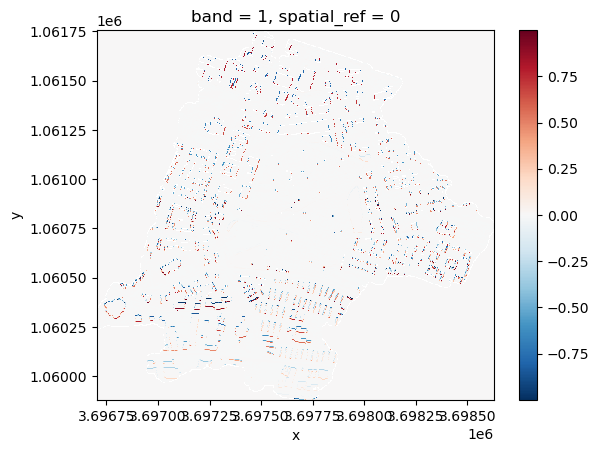

In [20]:
diff = new_dem - rds_og_dem
(new_dem - rds_og_dem).where(abs(diff) < 1).plot()